<a href="https://colab.research.google.com/github/AlySerry0/CSEN903-Airline-Team-133/blob/main/Airline_133.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA FETCHING

In [1]:
!git clone https://github.com/AlySerry0/CSEN903-Airline-RawData.git

raw_data_dir = '/content/CSEN903-Airline-RawData'

fatal: destination path 'CSEN903-Airline-RawData' already exists and is not an empty directory.


In [2]:
!pip install vaderSentiment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, Input
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping
!pip install shap lime
import shap
import lime
import lime.lime_tabular
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [3]:
AirlineScrappedReview = pd.read_csv(f'{raw_data_dir}/AirlineScrappedReview_Cleaned.csv')
Customer_comment = pd.read_csv(f'{raw_data_dir}/Customer_comment.csv')
Passanger_Booking_Data = pd.read_csv(f'{raw_data_dir}/Passanger_booking_data.csv')
Survey_Data_Inflight_Satisfaction_Score = pd.read_csv(f'{raw_data_dir}/Survey data_Inflight Satisfaction Score.csv')

DATA CLEANING

In [4]:
AirlineScrappedReview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Passanger_Name   3574 non-null   object 
 1   Flying_Date      955 non-null    object 
 2   Route            2809 non-null   object 
 3   Rating           3575 non-null   int64  
 4   Verified         3575 non-null   object 
 5   Review_title     3575 non-null   object 
 6   Review_content   3575 non-null   object 
 7   Traveller_Type   3575 non-null   object 
 8   Class            3575 non-null   object 
 9   Start_Location   2809 non-null   object 
 10  End_Location     2809 non-null   object 
 11  Layover_Route    484 non-null    object 
 12  Start_Latitude   3515 non-null   float64
 13  Start_Longitude  3515 non-null   float64
 14  Start_Address    3515 non-null   object 
 15  End_Latitude     3476 non-null   float64
 16  End_Longitude    3476 non-null   float64
 17  End_Address   

In [5]:
AirlineScrappedReview.head()

,Passanger_Name,Flying_Date,Route,Rating,Verified,Review_title,Review_content,Traveller_Type,Class,Start_Location,End_Location,Layover_Route,Start_Latitude,Start_Longitude,Start_Address,End_Latitude,End_Longitude,End_Address
0,Paige Boet,June 2023,New Orleans to London,1,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,New Orleans,London,NaN,29.975998,-90.078213,"New Orleans, Orleans Parish, Louisiana, United...",51.507446,-0.127765,"London, Greater London, England, United Kingdom"
1,S Layne,March 2023,London to Amman,1,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,London,Amman,NaN,51.507446,-0.127765,"London, Greater London, England, United Kingdom",31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,..."
2,E Lanewoski,NaN,Heathrow to Bodrum,2,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",Solo Leisure,Business Class,London Heathrow,Bodrum,NaN,51.467739,-0.458780,"London Heathrow Airport, The Beacon Roundabout...",37.034399,27.430651,"Bodrum, Muğla, Ege Bölgesi, Türkiye"
3,Joel Burman,June 2023,Amman to London,4,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Amman,London,NaN,31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...",51.507446,-0.127765,"London, Greater London, England, United Kingdom"
4,R Vines,NaN,London City to Ibiza,7,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Family Leisure,Business Class,London City,Ibiza,NaN,42.953765,-81.229153,"London (city), Ontario, N6C 0A7, Canada",38.974390,1.419746,"Eivissa, Illes Balears, España"


In [6]:
AirlineScrappedReview.isnull().sum()

,0
Passanger_Name,1
Flying_Date,2620
Route,766
Rating,0
Verified,0
Review_title,0
Review_content,0
Traveller_Type,0
Class,0
Start_Location,766


In [7]:
AirlineScrappedReview.describe(include='all')

,Passanger_Name,Flying_Date,Route,Rating,Verified,Review_title,Review_content,Traveller_Type,Class,Start_Location,End_Location,Layover_Route,Start_Latitude,Start_Longitude,Start_Address,End_Latitude,End_Longitude,End_Address
count,3574,955,2809,3575.000000,3575,3575,3575,3575,3575,2809,2809,484,3515.000000,3515.000000,3515,3476.000000,3476.000000,3476
unique,2759,100,1541,NaN,2,2570,3501,6,5,332,411,50,NaN,NaN,284,NaN,NaN,320
top,David Ellis,August 2015,London to Johannesburg,NaN,Not Verified,British Airways customer review,SFO-LHR-SFO in Premium Economy in December 201...,Couple Leisure,Economy Class,London Heathrow,London Heathrow,London,NaN,NaN,"Nanno, Ville d'Anaunia, Comunità della Val di ...",NaN,NaN,"Nanno, Ville d'Anaunia, Comunità della Val di ..."
freq,44,25,16,NaN,2508,947,2,949,1846,583,437,197,NaN,NaN,766,NaN,NaN,766
mean,NaN,NaN,NaN,4.790490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.639473,-2.164986,NaN,40.550399,-1.118816,NaN
std,NaN,NaN,NaN,3.170323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.022014,44.576587,NaN,18.723619,46.045735,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-37.666951,-123.182909,NaN,-37.814245,-123.179234,NaN
25%,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.893320,-0.458780,NaN,39.739236,-0.458780,NaN
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.314475,-0.127765,NaN,46.314475,-0.127765,NaN
75%,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.467739,11.048029,NaN,51.467739,11.048029,NaN


In [8]:
columns_to_drop = [
    'Flying_Date',        # Too many missing values
    'Passanger_Name', 'Review_title',     # Unneeded identifiers
]

AirlineScrappedReview['Layover_Route'] = AirlineScrappedReview['Layover_Route'].fillna("None")
AirlineScrappedReview = AirlineScrappedReview.drop(columns=columns_to_drop)
AirlineScrappedReview = AirlineScrappedReview.replace('Unknown', np.nan)
AirlineScrappedReview = AirlineScrappedReview.dropna()
AirlineScrappedReview = AirlineScrappedReview.drop_duplicates()

In [9]:
# Display the final prepped DataFrame
print("\n--- Final Prepped DataFrame ---")
AirlineScrappedReview.head()


--- Final Prepped DataFrame ---


,Route,Rating,Verified,Review_content,Traveller_Type,Class,Start_Location,End_Location,Layover_Route,Start_Latitude,Start_Longitude,Start_Address,End_Latitude,End_Longitude,End_Address
0,New Orleans to London,1,Trip Verified,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,New Orleans,London,None,29.975998,-90.078213,"New Orleans, Orleans Parish, Louisiana, United...",51.507446,-0.127765,"London, Greater London, England, United Kingdom"
1,London to Amman,1,Trip Verified,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,London,Amman,None,51.507446,-0.127765,"London, Greater London, England, United Kingdom",31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,..."
2,Heathrow to Bodrum,2,Trip Verified,"First time flying with BA business class, neve...",Solo Leisure,Business Class,London Heathrow,Bodrum,None,51.467739,-0.458780,"London Heathrow Airport, The Beacon Roundabout...",37.034399,27.430651,"Bodrum, Muğla, Ege Bölgesi, Türkiye"
3,Amman to London,4,Not Verified,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Amman,London,None,31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...",51.507446,-0.127765,"London, Greater London, England, United Kingdom"
4,London City to Ibiza,7,Trip Verified,This is a two-for-one review covering economy ...,Family Leisure,Business Class,London City,Ibiza,None,42.953765,-81.229153,"London (city), Ontario, N6C 0A7, Canada",38.974390,1.419746,"Eivissa, Illes Balears, España"


In [10]:
Customer_comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                9424 non-null   int64 
 1   flight_number             9424 non-null   int64 
 2   origin_station_code       9424 non-null   object
 3   destination_station_code  9424 non-null   object
 4   scheduled_departure_date  9424 non-null   object
 5   arrival_delay_group       9424 non-null   object
 6   departure_delay_group     9424 non-null   object
 7   entity                    9424 non-null   object
 8   verbatim_text             9424 non-null   object
 9   seat_factor_band          9424 non-null   object
 10  ques_verbatim_text        9424 non-null   object
 11  loyalty_program_level     6920 non-null   object
 12  fleet_type_description    9424 non-null   object
 13  fleet_usage               9424 non-null   object
 14  response_group          

In [11]:
Customer_comment.head()

,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text
0,0,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member,Neutral,salad dress staff inform flight receiv salad d...
1,1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,Neutral,choic
2,2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member,Neutral,varieti bigger snack
3,3,5469,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member,Neutral,serv pretzel cooki first class extrem disappoi...
4,4,281,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member,Neutral,inflight select purchas full meal


In [12]:
Customer_comment.isnull().sum()

,0
Unnamed: 0,0
flight_number,0
origin_station_code,0
destination_station_code,0
scheduled_departure_date,0
arrival_delay_group,0
departure_delay_group,0
entity,0
verbatim_text,0
seat_factor_band,0


In [13]:
Customer_comment.describe(include='all')

,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text
count,9424.000000,9424.000000,9424,9424,9424,9424,9424,9424,9424,9424,9424,6920,9424,9424,9424,9424,8405
unique,NaN,NaN,195,192,30,2,2,4,8013,4,1,7,22,2,3,2,7609
top,NaN,NaN,IAX,IAX,2022-09-10,Early & Ontime,Early & Ontime,Domestic,No.,90+,Is there anything else you'd like to share abo...,non-elite,B737-900,Mainline,member,Neutral,none
freq,NaN,NaN,1149,1427,399,6811,6241,6593,774,6302,9424,4128,1451,7985,6905,9307,97
mean,4711.500000,1741.573430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2720.618802,1550.550037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2355.750000,614.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4711.500000,1286.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7067.250000,2261.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print("\n--- Unique Values in Key Columns ---")
cols_to_check = ['arrival_delay_group', 'departure_delay_group', 'entity',
                 'seat_factor_band', 'loyalty_program_level', 'fleet_usage', 'response_group', 'sentiments']

for col in cols_to_check:
    print(f"Column '{col}': {Customer_comment[col].unique()}")


--- Unique Values in Key Columns ---
Column 'arrival_delay_group': ['Early & Ontime' 'Delayed']
Column 'departure_delay_group': ['Delayed' 'Early & Ontime']
Column 'entity': ['Atlantic' 'Domestic' 'Latin' 'Pacific']
Column 'seat_factor_band': ['0 to 70' '90+' '80+' '70+']
Column 'loyalty_program_level': ['non-elite' nan 'premier gold' 'premier 1k' 'premier silver'
 'global services' 'premier platinum' 'NBK']
Column 'fleet_usage': ['Mainline' 'Express']
Column 'response_group': ['member' 'non-member' 'NBK']
Column 'sentiments': ['Neutral' 'Negative']


In [15]:
# --- 1. Drop Unnecessary/Redundant Columns ---
columns_to_drop = [
    'Unnamed: 0',         # Duplicate index
    'ques_verbatim_text', # Only has one unique value, no info
    'transformed_text'    # Incomplete, and we have the raw 'verbatim_text'
]
Customer_comment = Customer_comment.drop(columns=columns_to_drop)

# --- 2. Handle Missing Data ---
# Fill missing loyalty levels with 'None'
Customer_comment['loyalty_program_level'] = Customer_comment['loyalty_program_level'].fillna('None')

# --- 3. Convert Data Types ---
# Convert date column to datetime objects
Customer_comment['scheduled_departure_date'] = pd.to_datetime(Customer_comment['scheduled_departure_date'])

Customer_comment = Customer_comment.drop_duplicates()

Customer_comment.info()
Customer_comment.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9422 entries, 0 to 9423
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   flight_number             9422 non-null   int64         
 1   origin_station_code       9422 non-null   object        
 2   destination_station_code  9422 non-null   object        
 3   scheduled_departure_date  9422 non-null   datetime64[ns]
 4   arrival_delay_group       9422 non-null   object        
 5   departure_delay_group     9422 non-null   object        
 6   entity                    9422 non-null   object        
 7   verbatim_text             9422 non-null   object        
 8   seat_factor_band          9422 non-null   object        
 9   loyalty_program_level     9422 non-null   object        
 10  fleet_type_description    9422 non-null   object        
 11  fleet_usage               9422 non-null   object        
 12  response_group           

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments
0,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,non-elite,B777-200,Mainline,member,Neutral
1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,None,B777-200,Mainline,non-member,Neutral
2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,non-elite,A320-200,Mainline,member,Neutral
3,5469,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90+,premier gold,ERJ-175,Express,member,Neutral
4,281,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,0 to 70,non-elite,B737-MAX8,Mainline,member,Neutral


In [16]:
Passanger_Booking_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [17]:
Passanger_Booking_Data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [18]:
Passanger_Booking_Data.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [19]:
Passanger_Booking_Data.describe(include='all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50002.000000,50002,50002,50002.000000,50002.000000,50002.000000,50002,50002,50002,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
unique,NaN,2,3,NaN,NaN,NaN,7,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,44383,49498,NaN,NaN,NaN,8102,2680,17873,NaN,NaN,NaN,NaN,NaN
mean,1.591256,NaN,NaN,84.940582,23.044778,9.066277,NaN,NaN,NaN,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,NaN,NaN,90.450548,33.887171,5.412569,NaN,NaN,NaN,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.000000,9.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.000000,13.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


In [20]:
print(Survey_Data_Inflight_Satisfaction_Score['score'].unique())
print(Survey_Data_Inflight_Satisfaction_Score['question_text'].unique())
print(Survey_Data_Inflight_Satisfaction_Score['driver_sub_group1'].unique())
print(Survey_Data_Inflight_Satisfaction_Score['driver_sub_group2'].unique())
print(Survey_Data_Inflight_Satisfaction_Score['media_provider'].unique())

Survey_Data_Inflight_Satisfaction_Score.info()

['2' '5' '3' '1' '4' 'chicken entrée' 'other (specify)'
 'vegetarian entrée' 'snack basket selection' 'sandwich/burger/wrap'
 'beef entrée' 'seafood entrée']
['How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?'
 'What item did you choose?']
['food & beverage']
['food and beverage satisfaction' 'comp']
[nan 'GOGO' 'PANASONIC' 'THALES' 'VIASAT']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47074 entries, 0 to 47073
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   flight_number                     47074 non-null  int64 
 1   origin_station_code               47074 non-null  object
 2   destination_station_code          47074 non-null  object
 3   record_locator                    47074 non-null  object
 4   scheduled_departure_date          47074 non-null  object
 5   question_text                     47074 non-null  object
 6   s

In [21]:
is_score = Survey_Data_Inflight_Satisfaction_Score['score'].str.isnumeric()
Survey_Data_Inflight_Satisfaction_Score['satisfaction_score'] = np.where(
    is_score,
    Survey_Data_Inflight_Satisfaction_Score['score'],
    np.nan
)

Survey_Data_Inflight_Satisfaction_Score['food_item_chosen'] = np.where(
    ~is_score,
    Survey_Data_Inflight_Satisfaction_Score['score'],
    np.nan
)


Survey_Data_Inflight_Satisfaction_Score['satisfaction_score'] = pd.to_numeric(Survey_Data_Inflight_Satisfaction_Score['satisfaction_score'], errors='coerce').astype('Int64')


Survey_Data_Inflight_Satisfaction_Score = Survey_Data_Inflight_Satisfaction_Score.drop('score', axis=1)


print(Survey_Data_Inflight_Satisfaction_Score[['satisfaction_score', 'food_item_chosen', 'question_text']].head(10))

Survey_Data_Inflight_Satisfaction_Score = Survey_Data_Inflight_Satisfaction_Score.drop(columns=['cabin_name'])
Survey_Data_Inflight_Satisfaction_Score['loyalty_program_level'] = Survey_Data_Inflight_Satisfaction_Score['loyalty_program_level'].fillna('None')
Survey_Data_Inflight_Satisfaction_Score = Survey_Data_Inflight_Satisfaction_Score.dropna(subset=['departure_gate'])
Survey_Data_Inflight_Satisfaction_Score = Survey_Data_Inflight_Satisfaction_Score.dropna(subset=['arrival_gate'])
Survey_Data_Inflight_Satisfaction_Score['media_provider'] = Survey_Data_Inflight_Satisfaction_Score['media_provider'].fillna(Survey_Data_Inflight_Satisfaction_Score['media_provider'].mode()[0])


   satisfaction_score food_item_chosen  \
0                   2              NaN   
1                   5              NaN   
2                   5              NaN   
3                   3              NaN   
4                   5              NaN   
5                   3              NaN   
6                   5              NaN   
7                   3              NaN   
8                   1              NaN   
9                   3              NaN   

                                       question_text  
0  How satisfied were you with the food & beverag...  
1  How satisfied were you with the food & beverag...  
2  How satisfied were you with the food & beverag...  
3  How satisfied were you with the food & beverag...  
4  How satisfied were you with the food & beverag...  
5  How satisfied were you with the food & beverag...  
6  How satisfied were you with the food & beverag...  
7  How satisfied were you with the food & beverag...  
8  How satisfied were you with the food & 

In [22]:
Survey_Data_Inflight_Satisfaction_Score.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,satisfaction_type,driver_sub_group1,driver_sub_group2,arrival_delay_minutes,...,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke,satisfaction_score,food_item_chosen
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,Dissatisfied,food & beverage,food and beverage satisfaction,-24,...,67,Short,C12,F10,Domestic,non-member,PANASONIC,spoke departure,2,NaN
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,Satisfied,food & beverage,food and beverage satisfaction,10,...,72,Short,5,B60,Domestic,member,GOGO,spoke departure,5,NaN
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,Satisfied,food & beverage,food and beverage satisfaction,-8,...,72,Short,7,A71,Domestic,member,GOGO,spoke departure,5,NaN
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,Dissatisfied,food & beverage,food and beverage satisfaction,-11,...,72,Short,B82,5,Domestic,member,PANASONIC,hub departure,3,NaN
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,Satisfied,food & beverage,food and beverage satisfaction,18,...,72,Short,B24,3,Domestic,member,PANASONIC,hub departure,5,NaN


In [23]:
Survey_Data_Inflight_Satisfaction_Score.isnull().sum()

,0
flight_number,0
origin_station_code,0
destination_station_code,0
record_locator,0
scheduled_departure_date,0
question_text,0
satisfaction_type,12094
driver_sub_group1,0
driver_sub_group2,0
arrival_delay_minutes,0


In [24]:
Survey_Data_Inflight_Satisfaction_Score.describe(include='all')

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,satisfaction_type,driver_sub_group1,driver_sub_group2,arrival_delay_minutes,...,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke,satisfaction_score,food_item_chosen
count,46451.000000,46451,46451,46451,46451,46451,34357,46451,46451,46451.000000,...,46451.000000,46451,46451,46451,46451,46451,46451,46451,34357.0,12094
unique,NaN,207,188,32549,30,2,2,1,2,NaN,...,NaN,3,656,692,2,3,4,2,<NA>,7
top,NaN,IAX,EWX,MHXXTX,9/10/2022,How satisfied were you with the food & beverag...,Dissatisfied,food & beverage,food and beverage satisfaction,NaN,...,NaN,Medium,A8,HOLD,Domestic,member,PANASONIC,hub departure,<NA>,chicken entrée
freq,NaN,5654,7056,6,1845,34357,21979,46451,34357,NaN,...,NaN,26149,588,965,28628,34953,26154,23818,<NA>,4930
mean,1483.641493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.724936,...,2504.397193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.873126,NaN
std,1408.242555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.953904,...,1863.281349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.429383,NaN
min,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-104.000000,...,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
25%,468.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-19.000000,...,960.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
50%,1034.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.000000,...,1874.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
75%,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,...,3892.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN


DATA ENGINEERING QUESTIONS

In [25]:
AirlineScrappedReview['Satisfaction'] = (AirlineScrappedReview['Rating'] >= 5).astype(int)
sia = SentimentIntensityAnalyzer()
AirlineScrappedReview['Sentiment_Score'] = AirlineScrappedReview['Review_content'].apply(
    lambda review: sia.polarity_scores(review)['compound']
)

In [26]:
top_10_routes = AirlineScrappedReview['Route'].value_counts().head(10)
print("The most popular 10 routes are:" , top_10_routes)

The most popular 10 routes are: Route
London to Johannesburg    16
London to Cape Town       15
BKK to LHR                13
Johannesburg to London    13
Cape Town to London       13
Vancouver to London       13
LHR to MIA                12
London to Hong Kong       11
Hong Kong to London       11
London to Athens          11
Name: count, dtype: int64


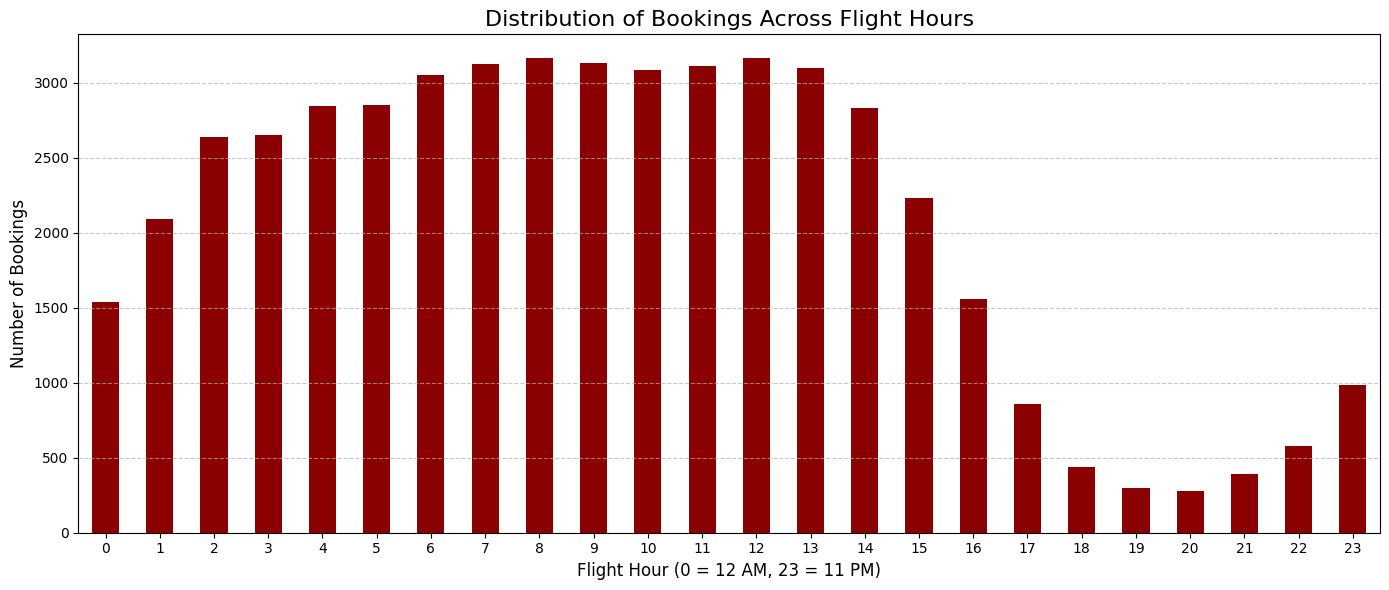

In [27]:
bookings_df = Passanger_Booking_Data

# 2. Calculate the number of completed bookings for each flight hour
hourly_bookings = bookings_df['flight_hour'].value_counts().sort_index()

plt.figure(figsize=(14, 6))

# Create a bar chart
hourly_bookings.plot(kind='bar', color='darkred') # Changed color for distinction

plt.title('Distribution of Bookings Across Flight Hours', fontsize=16)
plt.xlabel('Flight Hour (0 = 12 AM, 23 = 11 PM)', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=0, ha='center') # Ensure hours are readable
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot with a new name
plt.savefig('flight_hour_distribution.png')

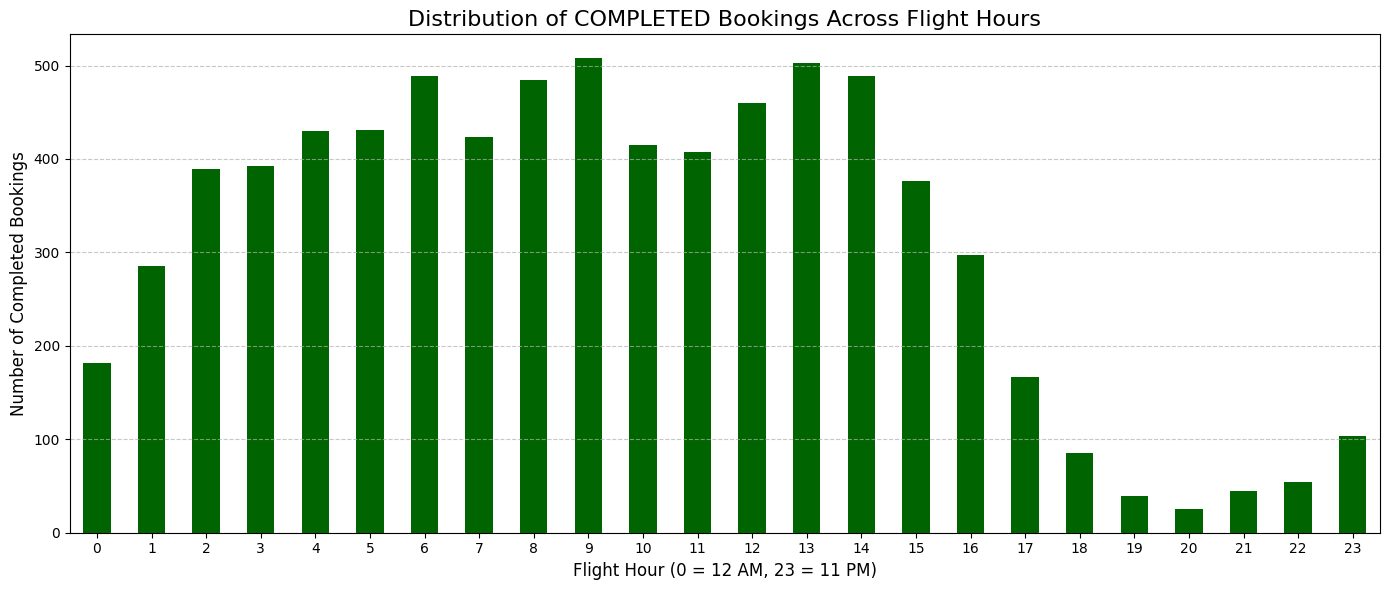

In [28]:
completed_bookings_df = Passanger_Booking_Data[Passanger_Booking_Data['booking_complete'] == 1]

# 2. Calculate the number of completed bookings for each flight hour
hourly_bookings = completed_bookings_df['flight_hour'].value_counts().sort_index()

plt.figure(figsize=(14, 6))

# Create a bar chart
hourly_bookings.plot(kind='bar', color='darkgreen') # Changed color for distinction

plt.title('Distribution of COMPLETED Bookings Across Flight Hours', fontsize=16)
plt.xlabel('Flight Hour (0 = 12 AM, 23 = 11 PM)', fontsize=12)
plt.ylabel('Number of Completed Bookings', fontsize=12)
plt.xticks(rotation=0, ha='center') # Ensure hours are readable
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot with a new name
plt.savefig('completed_flight_hour_distribution.png')

In [29]:
combination_ratings = AirlineScrappedReview.groupby(['Traveller_Type', 'Class'])['Rating'].mean()

highest_rating_combo = combination_ratings.idxmax()
highest_rating_score = combination_ratings.max()

lowest_rating_combo = combination_ratings.idxmin()
lowest_rating_score = combination_ratings.min()

print("--- Traveler Type and Class Rating Analysis ---")
print("\n🏆 Highest Rated Combination:")
print(f"  Combination: {highest_rating_combo[0]} in {highest_rating_combo[1]}")
print(f"  Average Rating: {highest_rating_score:.3f}")

print("\n📉 Lowest Rated Combination:")
print(f"  Combination: {lowest_rating_combo[0]} in {lowest_rating_combo[1]}")
print(f"  Average Rating: {lowest_rating_score:.3f}")

--- Traveler Type and Class Rating Analysis ---

🏆 Highest Rated Combination:
  Combination: Solo Leisure in First Class
  Average Rating: 6.526

📉 Lowest Rated Combination:
  Combination: Various in Economy Class
  Average Rating: 1.000


ENCODING

In [30]:
AirlineScrappedReview['Verified'] = AirlineScrappedReview['Verified'].map({
    'Trip Verified': 1,
    'Not Verified': 0
})

AirlineScrappedReview = pd.get_dummies(AirlineScrappedReview,
                                       columns=['Traveller_Type', 'Class'],
                                       drop_first=True,
                                       dtype=int)

AirlineScrappedReview['is_layover'] = (AirlineScrappedReview['Layover_Route'] != 'None').astype(int)

def haversine(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
    return c * r

AirlineScrappedReview['flight_distance_km'] = haversine(
    AirlineScrappedReview['Start_Latitude'],
    AirlineScrappedReview['Start_Longitude'],
    AirlineScrappedReview['End_Latitude'],
    AirlineScrappedReview['End_Longitude']
)

start_freq = AirlineScrappedReview['Start_Location'].map(AirlineScrappedReview['Start_Location'].value_counts())
end_freq = AirlineScrappedReview['End_Location'].map(AirlineScrappedReview['End_Location'].value_counts())
AirlineScrappedReview['start_loc_freq'] = start_freq
AirlineScrappedReview['end_loc_freq'] = end_freq

AirlineScrappedReview['start_country'] = AirlineScrappedReview['Start_Address'].apply(lambda x: x.split(',')[-1].strip())
AirlineScrappedReview['end_country'] = AirlineScrappedReview['End_Address'].apply(lambda x: x.split(',')[-1].strip())

AirlineScrappedReview['is_international'] = (AirlineScrappedReview['start_country'] != AirlineScrappedReview['end_country']).astype(int)

AirlineScrappedReview = AirlineScrappedReview.drop(['Start_Address', 'End_Address', 'Layover_Route', 'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude', 'start_country', 'end_country', 'Review_content', 'Route'], axis=1)

AirlineScrappedReview.head()

,Rating,Verified,Start_Location,End_Location,Satisfaction,Sentiment_Score,Traveller_Type_Couple Leisure,Traveller_Type_Family Leisure,Traveller_Type_Solo Leisure,Traveller_Type_Various,Class_Economy Class,Class_First Class,Class_Premium Economy,is_layover,flight_distance_km,start_loc_freq,end_loc_freq,is_international
0,1,1,New Orleans,London,0,-0.7990,0,0,1,0,1,0,0,0,7444.551846,4,393,1
1,1,1,London,Amman,0,0.0219,1,0,0,0,0,0,0,0,3640.042086,495,2,1
2,2,1,London Heathrow,Bodrum,0,-0.7096,0,0,1,0,0,0,0,0,2713.226060,528,1,1
3,4,0,Amman,London,0,-0.5849,0,0,1,0,1,0,0,0,3640.042086,4,393,1
4,7,1,London City,Ibiza,1,0.9789,0,1,0,0,0,0,0,0,6661.461251,11,4,1


NORMALIZATION

In [31]:
numerical_cols = ['Sentiment_Score', 'flight_distance_km', 'start_loc_freq', 'end_loc_freq']
scaler = StandardScaler()

AirlineScrappedReview[numerical_cols] = scaler.fit_transform(AirlineScrappedReview[numerical_cols])

In [32]:
X = AirlineScrappedReview.drop('Satisfaction', axis=1)
y = AirlineScrappedReview['Satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X2_train = X_train.copy(deep=True)
X2_test = X_test.copy(deep=True)

train_data = pd.concat([X_train, y_train], axis=1)

# Calculate the mean 'Rating' for each category in the training data
start_loc_map = train_data.groupby('Start_Location')['Rating'].mean()
end_loc_map = train_data.groupby('End_Location')['Rating'].mean()

X2_train['Start_Loc_Avg_Rating'] = X2_train['Start_Location'].map(start_loc_map)
X2_train['End_Loc_Avg_Rating'] = X2_train['End_Location'].map(end_loc_map)

X2_test['Start_Loc_Avg_Rating'] = X2_test['Start_Location'].map(start_loc_map)
X2_test['End_Loc_Avg_Rating'] = X2_test['End_Location'].map(end_loc_map)

global_mean_rating = train_data['Rating'].mean()
X2_test['Start_Loc_Avg_Rating'].fillna(global_mean_rating, inplace=True)
X2_test['End_Loc_Avg_Rating'].fillna(global_mean_rating, inplace=True)

X_train = X_train.drop(['Start_Location', 'End_Location', 'Rating'], axis=1)
X_test = X_test.drop(['Start_Location', 'End_Location', 'Rating'], axis=1)
X2_train = X2_train.drop(['Start_Location', 'End_Location', 'Rating'], axis=1)
X2_test = X2_test.drop(['Start_Location', 'End_Location', 'Rating'], axis=1)

/tmp/ipython-input-3555695128.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X2_test['Start_Loc_Avg_Rating'].fillna(global_mean_rating, inplace=True)
/tmp/ipython-input-3555695128.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

MODEL 1 vs MODEL 2 vs MODEL 3

In [33]:
model1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])

model2 = Sequential([
    Input(shape=(X2_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])
model3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])

In [34]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       Precision(name='precision'),
                       Recall(name='recall')])

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       Precision(name='precision'),
                       Recall(name='recall')])
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       Precision(name='precision'),
                       Recall(name='recall')])

In [35]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
history1 = model1.fit(X_train, y_train,
                    epochs=50,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stop])

history2 = model2.fit(X2_train, y_train,
                    epochs=50,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stop])

history3 = model3.fit(X_train, y_train,
                    epochs=50,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.5939 - loss: 0.6766 - precision: 0.5601 - recall: 0.3164 - val_accuracy: 0.7311 - val_loss: 0.6270 - val_precision: 0.7615 - val_recall: 0.4854
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7273 - loss: 0.6131 - precision: 0.7282 - recall: 0.5746 - val_accuracy: 0.7783 - val_loss: 0.5464 - val_precision: 0.6995 - val_recall: 0.7895
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7848 - loss: 0.5285 - precision: 0.7321 - recall: 0.8069 - val_accuracy: 0.7759 - val_loss: 0.4825 - val_precision: 0.6979 - val_recall: 0.7836
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7945 - loss: 0.4799 - precision: 0.7448 - recall: 0.8084 - val_accuracy: 0.7830 - val_loss: 0.4623 - val_precision: 0.7135 - val_recall: 0.7719
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8100 - loss: 0.4417 - precision: 0.7622 - recall: 0.8142 - val_accuracy: 0.7877 - val_loss: 0.4568 - v

Model Evaluations and Comparisons

In [36]:
# Evaluate Model 1
metrics1 = model1.evaluate(X_test, y_test, verbose=0)
y_pred1 = (model1.predict(X_test) > 0.5).astype("int32") # Get binary predictions
f1_1 = f1_score(y_test, y_pred1)

# Evaluate Model 2 (Using X2_test, which likely contains the Target Encoded features)
metrics2 = model2.evaluate(X2_test, y_test, verbose=0)
y_pred2 = (model2.predict(X2_test) > 0.5).astype("int32")
f1_2 = f1_score(y_test, y_pred2)

# Evaluate Model 3
metrics3 = model3.evaluate(X_test, y_test, verbose=0)
y_pred3 = (model3.predict(X_test) > 0.5).astype("int32")
f1_3 = f1_score(y_test, y_pred3)


# --- Consolidate Results ---
# Assuming the evaluation results are returned in the order defined in model.compile (Loss, Accuracy, Precision, Recall)
results = {
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Test Loss': [metrics1[0], metrics2[0], metrics3[0]],
    'Accuracy': [metrics1[1], metrics2[1], metrics3[1]],
    'Precision': [metrics1[2], metrics2[2], metrics3[2]],
    'Recall': [metrics1[3], metrics2[3], metrics3[3]],
    'F1-Score': [f1_1, f1_2, f1_3]
}

df_results = pd.DataFrame(results)

print("--- Model Evaluation Results ---")
print(df_results.to_markdown(index=False))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
--- Model Evaluation Results ---
| Model   |   Test Loss |   Accuracy |   Precision |   Recall |   F1-Score |
|:--------|------------:|-----------:|------------:|---------:|-----------:|
| Model 1 |    0.434089 |   0.831758 |    0.81448  | 0.789474 |   0.801782 |
| Model 2 |    0.460664 |   0.795841 |    0.77027  | 0.75     |   0.76     |
| Model 3 |    0.508092 |   0.818525 |    0.766129 | 0.833333 |   0.798319 |


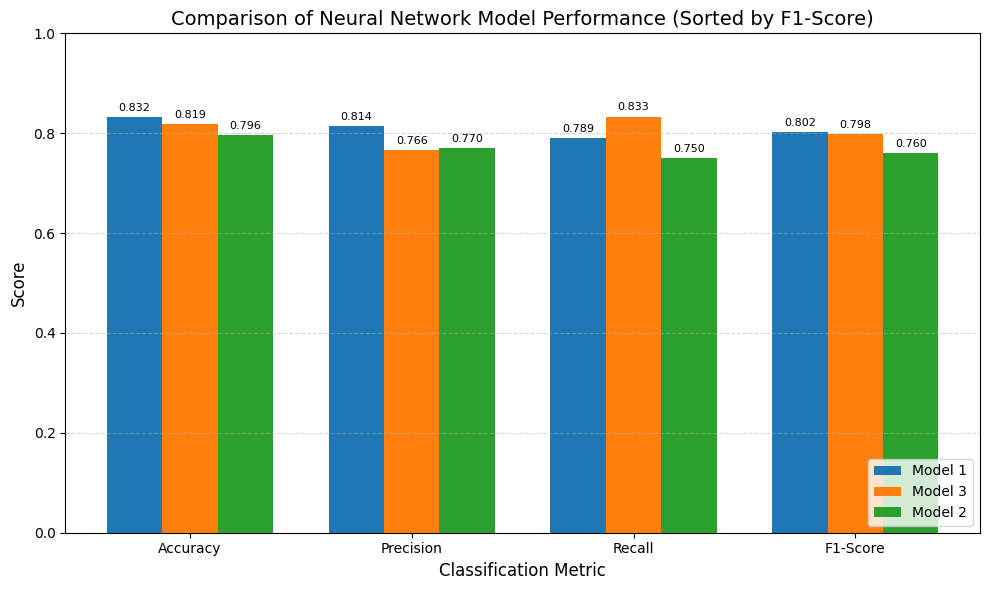

In [37]:
df_sorted = df_results.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)

# 2. Identify the best model
best_model = df_sorted.iloc[0]

# --- Visualization Code (Modified for Sorting) ---

# Set the metrics to plot
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Prepare data for plotting, using the sorted DataFrame
plot_data = df_sorted.set_index('Model')[metrics_to_plot].T
models = plot_data.columns.tolist() # Get model names in sorted order

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot grouped bars
bar_width = 0.25
index = np.arange(len(metrics_to_plot))

# Plot bars based on the sorted model names
rects1 = ax.bar(index, plot_data[models[0]], bar_width, label=models[0], color='#1f77b4') # Best Model
rects2 = ax.bar(index + bar_width, plot_data[models[1]], bar_width, label=models[1], color='#ff7f0e') # Second Best
rects3 = ax.bar(index + 2*bar_width, plot_data[models[2]], bar_width, label=models[2], color='#2ca02c') # Worst Model

# Add labels and title
ax.set_ylabel('Score', fontsize=12)
ax.set_xlabel('Classification Metric', fontsize=12)
ax.set_title('Comparison of Neural Network Model Performance (Sorted by F1-Score)', fontsize=14)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics_to_plot)
ax.legend(loc='lower right')
ax.set_ylim(0, 1.0) # Metrics range from 0 to 1

# Add data labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('model_comparison_f1_sorted_new.png')
# End of code

Explainability

PermutationExplainer explainer: 2117it [04:40,  7.38it/s]
/tmp/ipython-input-4090711643.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values.values, X_train,


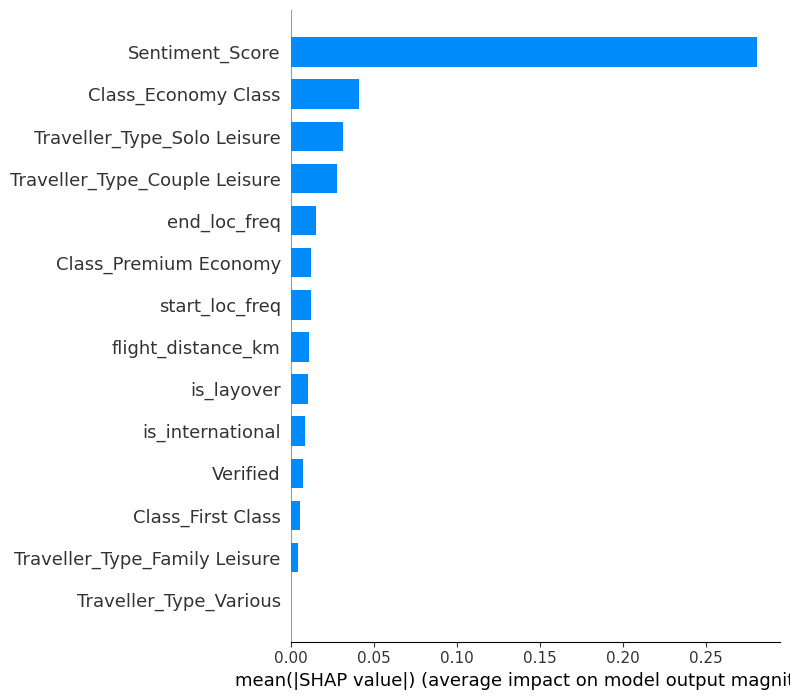

In [38]:
def predict_fn(X):
    return model1.predict(X)

background = shap.sample(X_train, 100, random_state=42)
explainer = shap.Explainer(model1, background,feature_names=X_train.columns)
shap_values = explainer(X_train)
# Global summary
shap.summary_plot(shap_values.values, X_train,
feature_names=X_train.columns, plot_type='bar')

In [39]:
X_train.head()

,Verified,Sentiment_Score,Traveller_Type_Couple Leisure,Traveller_Type_Family Leisure,Traveller_Type_Solo Leisure,Traveller_Type_Various,Class_Economy Class,Class_First Class,Class_Premium Economy,is_layover,flight_distance_km,start_loc_freq,end_loc_freq,is_international
2749,0,1.073120,1,0,0,0,1,0,0,0,0.877039,1.301044,-0.697725,1
2656,0,-0.296158,1,0,0,0,1,0,0,0,-1.188793,-0.107864,-0.748812,1
1569,0,0.079885,1,0,0,0,1,0,0,0,-1.287791,-0.883602,1.470613,0
1513,0,-1.017813,0,0,0,0,0,0,1,1,0.759236,-0.871022,-0.726107,1
1173,1,0.942445,1,0,0,0,0,0,0,1,-1.190220,-0.795545,-0.737459,1


In [40]:
# --- 4. Encode Binary Categorical Columns ---
# We'll map the "negative" or "delayed" state to 1 and the "positive" state to 0

Customer_comment['arrival_delay_group'] = Customer_comment['arrival_delay_group'].map({
    'Delayed': 1,
    'Early & Ontime': 0
})

Customer_comment['departure_delay_group'] = Customer_comment['departure_delay_group'].map({
    'Delayed': 1,
    'Early & Ontime': 0
})

Customer_comment['sentiments'] = Customer_comment['sentiments'].map({
    'Negative': 1,
    'Neutral': 0
})

# --- 5. Encode Ordinal 'seat_factor_band' Column ---
band_mapping = {
    '0 to 70': 0,
    '70+': 1,
    '80+': 2,
    '90+': 3
}

Customer_comment['seat_factor_band'] = Customer_comment['seat_factor_band'].map(band_mapping)